In [225]:
import numpy as np
import numba
import matplotlib.pyplot as plt
import sympy as sym
plt.style.use('presentation')
%matplotlib notebook

def d2np(d):
    
    names = []
    numbers = ()
    dtypes = []
    for item in d:
        names += item   
        if type(d[item]) == float:
            numbers += (d[item],)
            dtypes += [(item,float)]
        if type(d[item]) == int:
            numbers += (d[item],)
            dtypes += [(item,int)]
        if type(d[item]) == np.ndarray:
            numbers += (d[item],)
            dtypes += [(item,np.float64,d[item].shape)]
    return np.array([numbers],dtype=dtypes)

In [226]:
d = dict(t_remote = np.ones((1000,1))*1.0e12,
         delay_avg = 0.25,
         t=0.0,
         p_remote= np.zeros((1000,1)),
         p = 0.0,
         it= 0,
         t_old = -100.0,
         p_ppc = 0.0 ,
         t_prev = 0.0,)


In [227]:

def pcc(struct):
    t = struct[0]['t']
    if t>struct[0]['t_prev']+0.2: 
        struct[0]['p_ppc'] = np.sin(t)
        struct[1]['p_ppc'] = np.sin(t)
        struct[0]['t_prev'] = t
    struct[0]['t_remote'][struct[0]['it'],0] = t
    struct[0]['p_remote'][struct[0]['it'],0] = float(struct[0]['p_ppc'])
    struct[1]['t_remote'][struct[0]['it'],0] = t
    struct[1]['p_remote'][struct[0]['it'],0] = float(struct[1]['p_ppc'])
    return 0

def g1(struct):
    t = struct[0]['t']
    delay_avg = struct[0]['delay_avg']
    t_delay = np.random.normal(delay_avg,delay_avg/4)
    t_remote_new = t-t_delay

    if t_remote_new>=struct[0]['t_old']:
        r_it = np.argmax(struct[0]['t_remote']>=t_remote_new)
        p = struct[0]['p_remote'][r_it,0]
        #print('p1:', p )
        struct[0]['p'] = float(p)
        struct[0]['t_old'] = float(t_remote_new)
        
    return 0

def g2(struct):
    t = struct[1]['t']
    delay_avg = struct[1]['delay_avg']
    t_delay = np.random.normal(delay_avg,delay_avg/4)
    t_remote_new = t-t_delay

    if t_remote_new>=struct[1]['t_old']:
        r_it = np.argmax(struct[1]['t_remote']>=t_remote_new)
        p = struct[1]['p_remote'][r_it,0]
        #print('p1:', p )
        struct[1]['p'] = float(p)
        struct[1]['t_old'] = float(t_remote_new)
    return 0

def run(struct):
    Dt = 0.01
    T = []
    P_ppc = []
    P_1 = []
    P_2 = []
    for it in range(500):
        t = Dt*it
        struct[0]['it'] = it
        struct[1]['it'] = it
        struct[0]['t'] = t
        struct[1]['t'] = t
        pcc(struct)
        g1(struct)
        g2(struct)
        T += [t]
        P_ppc += [struct[0]['p_ppc']]
        P_1 += [struct[0]['p']]
        P_2 += [struct[1]['p']]
    return np.array(T),np.array(P_1),np.array(P_2),np.array(P_ppc)

        
        
        
        
    
    
    


<IPython.core.display.Javascript object>


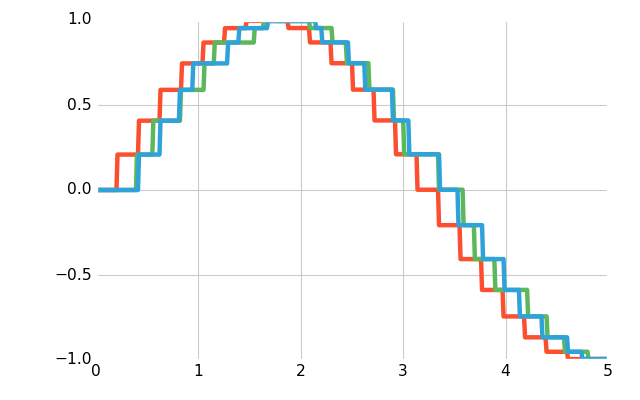

In [228]:
struct = d2np(d)
struct = np.hstack((struct[0],np.copy(struct[0])))

T,P_1, P_2,P_ppc = run(struct)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 5), sharex = True)
axes.plot(T,P_ppc)
axes.plot(T,P_1)
axes.plot(T,P_2)


In [229]:
P_ppc

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.2084599 ,  0.2084599 ,  0.2084599 ,  0.2084599 ,
        0.2084599 ,  0.2084599 ,  0.2084599 ,  0.2084599 ,  0.2084599 ,
        0.2084599 ,  0.2084599 ,  0.2084599 ,  0.2084599 ,  0.2084599 ,
        0.2084599 ,  0.2084599 ,  0.2084599 ,  0.2084599 ,  0.2084599 ,
        0.2084599 ,  0.2084599 ,  0.40776045,  0.40776045,  0.40776045,
        0.40776045,  0.40776045,  0.40776045,  0.40776045,  0.40776045,
        0.40776045,  0.40776045,  0.40776045,  0.40776045,  0.40776045,
        0.40776045,  0.40776045,  0.40776045,  0.40776045,  0.40776045,
        0.40776045,  0.40776045,  0.40776045,  0.58914476,  0.58914476,
        0.58914476,  0.58914476,  0.58914476,  0.58914476,  0.58

In [141]:
struct[0]['t_remote'][struct[0]['t_remote']>=1.5]

array([ 1.5,  1.6,  1.7,  1.8,  1.9])